# <font face='gotham' color='purple'> Algorithmic Trading and Risk Management Strategy Research </font> 
### <font face='serif'> Developer: [Juan Fraderick](https://github.com/juan-learns-to-code) </font>

<font face='serif' color=gray> Thank you for clicking and reviewing my project. This is my first time developing an algorithmic trading strategy, so I'm open to any feedback and comments. That said, this notebook is both a trading thesis for BYD Co., Ltd. (1211.HK) and a demonstration on how I think about trading, which would change through my life and career. By the end of this research, I will cite all the developers and resource that I use to base my assumptions.</font>

<font face='serif' color='gray'>A bit about me, I am a rising junior at the Chinese University of Hong Kong (CUHK) studying economics and finance, with a minor in statistics. In a professional setting, I describe myself as a data nerd with love for econometrics and quantitative finance. In a personal setting, I am willing to try out multiple professional shoes until it fits right. Please find more about me on my [LinkedIn](https://www.linkedin.com/in/juanfraderick/) profile and let's connect!</font>

### <font face='gotham' color='purple'>1. Trading and Strategy Overview</font>

<font face='serif'>The role of technology has became more important than ever in finance, bringing new innovation, much faster execution, and eliminates human error, with a goal to make profit off the financial market. The beautiful thing about financial markets is that it always move: it may not show strong momentum or trends at any given time, but that doesn't mean you can't analyze the pattern. An asset class, stocks in this context, is reflection on how that particular company perform. Therefore, the idea of algorithmic trading is to execute trade orders automatically by pre-programmed instructions. Over and above, it utilize complex statistical formulas to assess the dynamic market situation.</font>

<font face='serif'>There are lots of trading strategies out there that a trader can choose from. For this project, I use the mean reversion or simple contrarian strategy. This approach assumes that prices will revert back towards the mean because markets are forever moving in and out of phase of mean reversion and momentum. To apply this strategy, I also computed financial ratios including the Sharpe, Calmar, and Sortino, as well as find the investment multiples.</font>

### <font face='gotham' color='purple'>2. Getting the data</font>

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [10]:
#using the same dataset as the contrarian strategy
data = pd.read_csv('intraday.csv', parse_dates = ['time'], index_col = 'time')
data.columns = ['price']
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


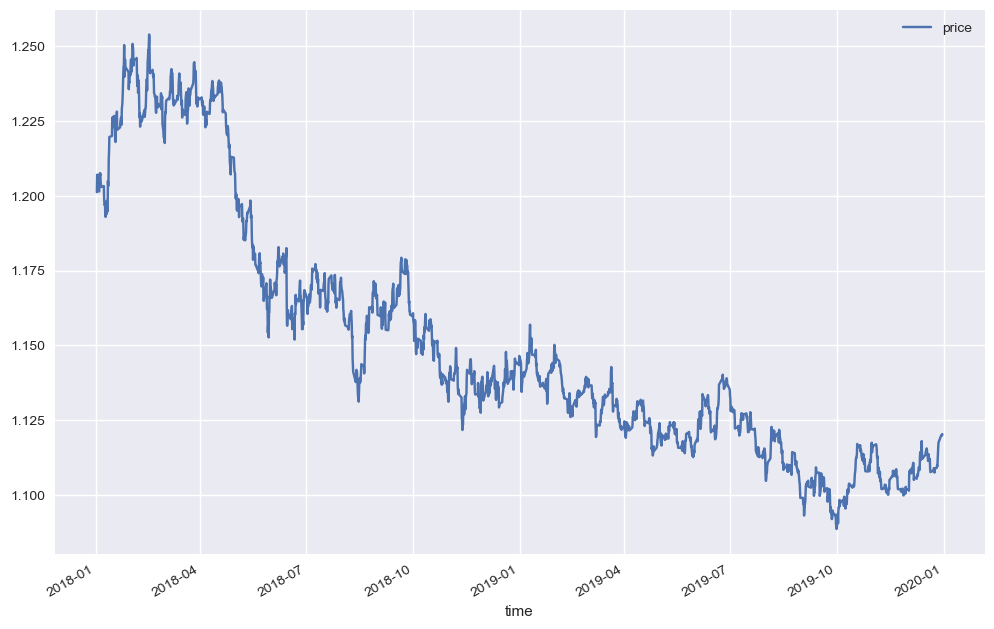

In [12]:
#visualizing the price chart
#mean reversion = identify high prices
#need advance tools like bollinger bands
data.plot(figsize = (12,8))
plt.show()

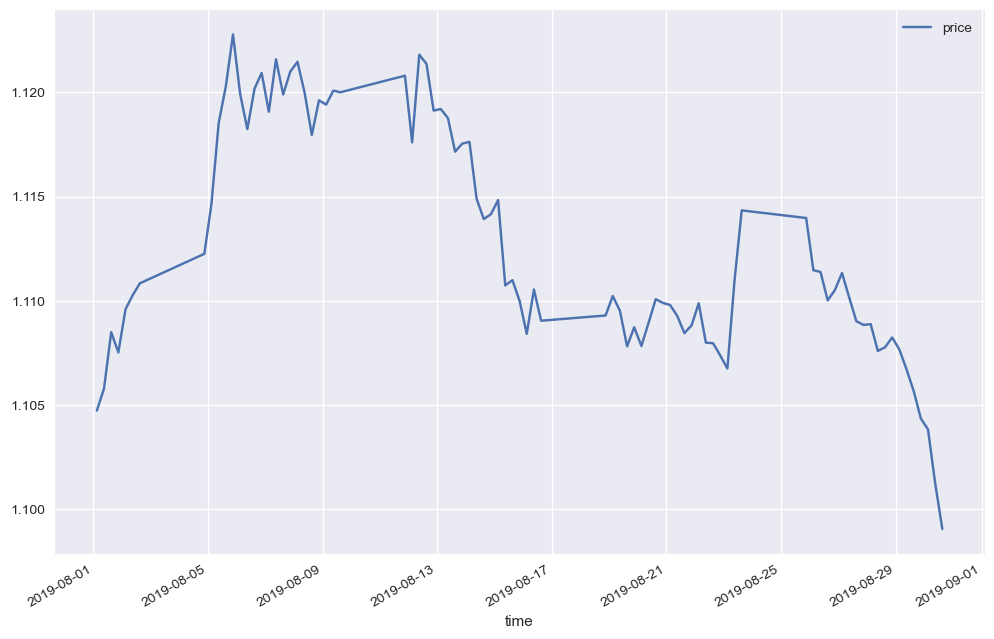

In [13]:
data.loc['2019-08'].plot(figsize = (12,8))
plt.show()

In [14]:
data['returns'] = np.log(data.div(data.shift(1)))

In [15]:
#prepare the data and calculate log return for six hour period
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


## 2. Defining a mean-reversion strategy

In [16]:
#mean reversion: financial instruments are from time to time overbought or oversold and revert back to mean prices
#bollinger bands: consist of a SMA (e.g., 30) and upper and lower bonds +- 2 standard deviation away from SMA
#usually 2 standard deviation
SMA = 30
dev = 2

In [17]:
data['SMA'] = data['price'].rolling(SMA).mean()

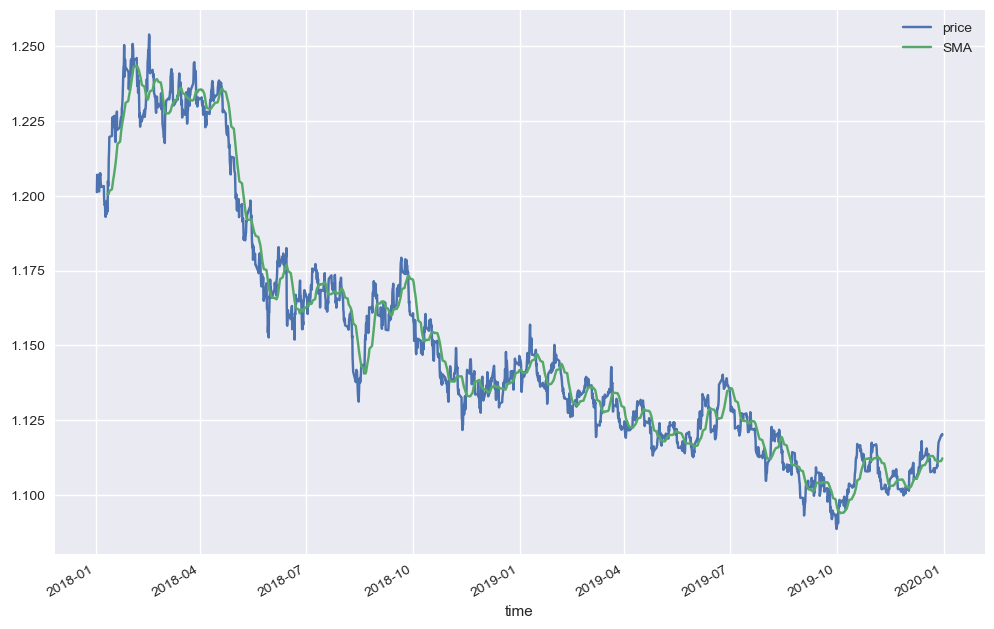

In [18]:
#blue = price
#green = SMA
data[['price','SMA']].plot(figsize = (12,8))
plt.show()

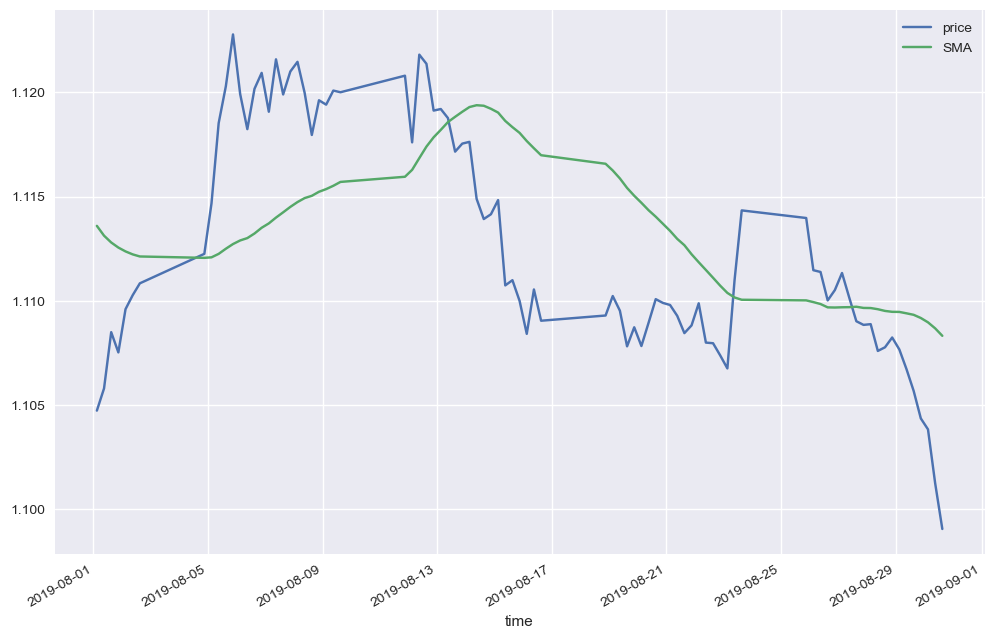

In [19]:
#focus on month 2019
data.loc['2019-08',['price','SMA']].plot(figsize=(12,8))
plt.show()

In [20]:
data['price'].rolling(SMA).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

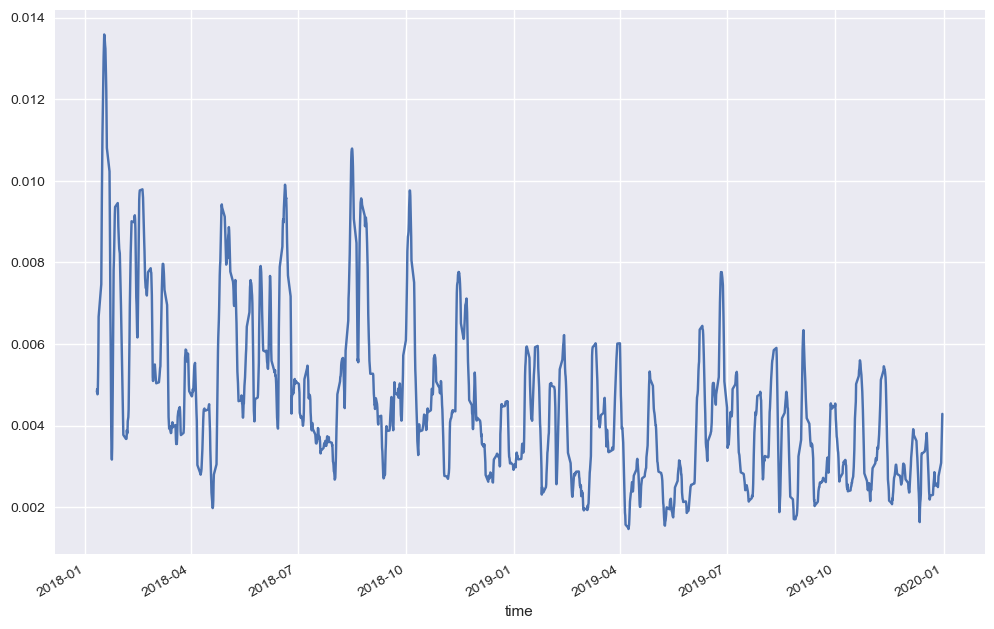

In [21]:
#rolling standard deviation
data['price'].rolling(SMA).std().plot(figsize = (12,8))
plt.show()

In [22]:
data

,price,returns,SMA
time,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,NaN
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777


In [23]:
#defining the lower bollinger band (-2 standard deviation)
data['Lower'] = data['SMA'] - data['price'].rolling(SMA).std() * dev

In [24]:
#defining the upper bollinger band (+2 standard deviation)
data['Upper'] = data['SMA'] + data['price'].rolling(SMA).std() * dev

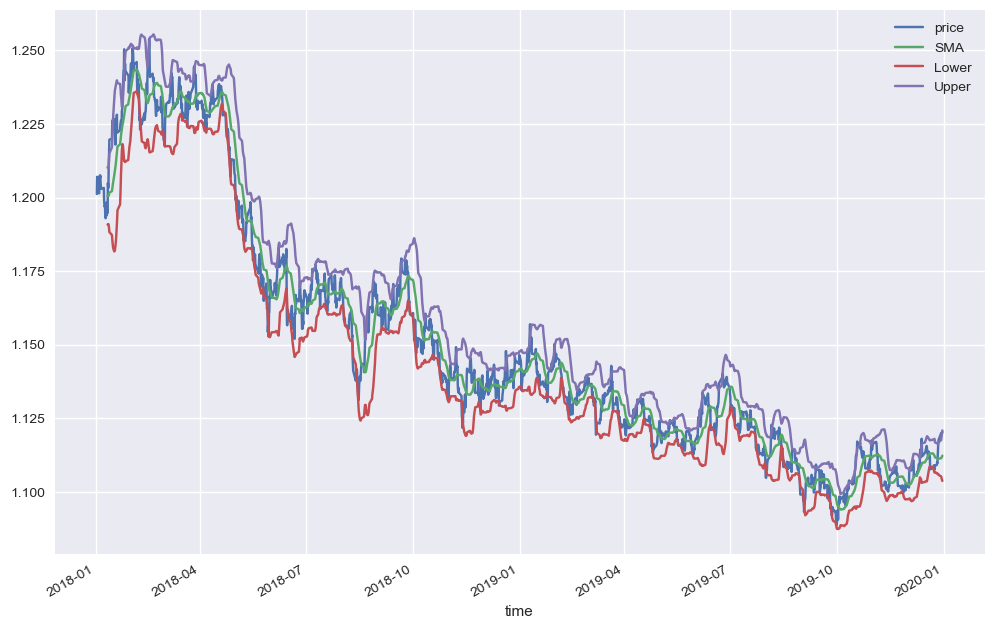

In [25]:
#complete 2 years period (read description)
data.drop(columns='returns').plot(figsize=(12,8))
plt.show()

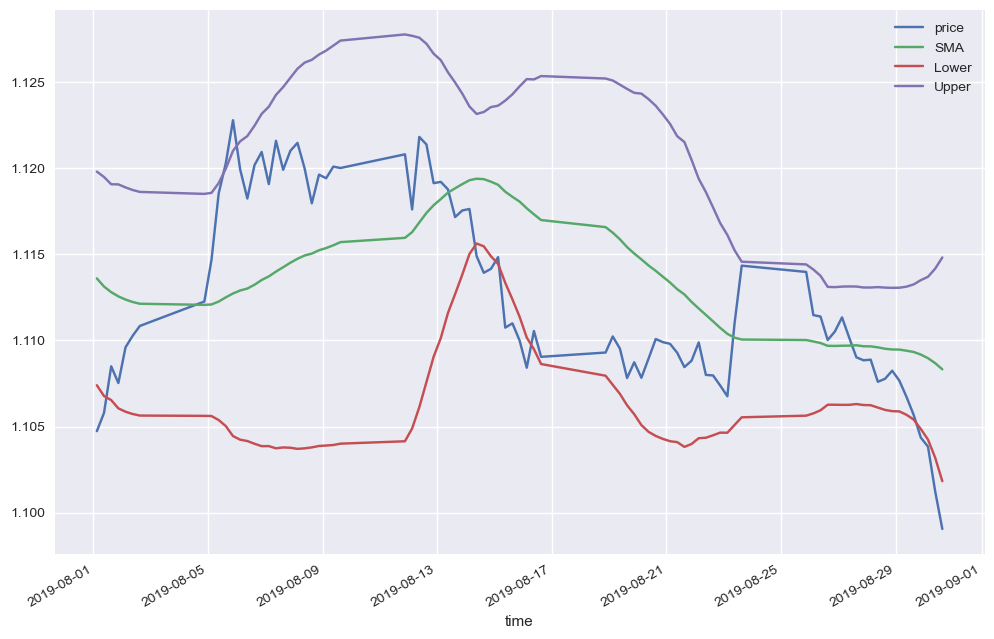

In [26]:
#showing the august 2019 price movement (read description)
data.drop(columns='returns').loc['2019-08'].plot(figsize=(12,8))
plt.show()

In [27]:
data.dropna(inplace=True)

In [28]:
data 

,price,returns,SMA,Lower,Upper
time,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235


In [29]:
data['distance'] = data.price - data.SMA

In [30]:
#1. oversold condition = go long
data['position'] = np.where(data.price < data.Lower, 1, np.nan)

In [31]:
#2. overbought condition = go short
data['position'] = np.where(data.price > data.Upper, -1, data['position'])

In [32]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,NaN
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [33]:
#3. crossing SMA (middle band) = go neutral
data['position'] = np.where(data.distance * data.distance.shift(1) < 0,0, data['position'])

In [34]:
#4. when 1-3 scenario isnt applicable = hold previous position
data['position'] = data.position.ffill().fillna(0)

In [35]:
data.position.value_counts()

 0.0    919
 1.0    596
-1.0    526
Name: position, dtype: int64

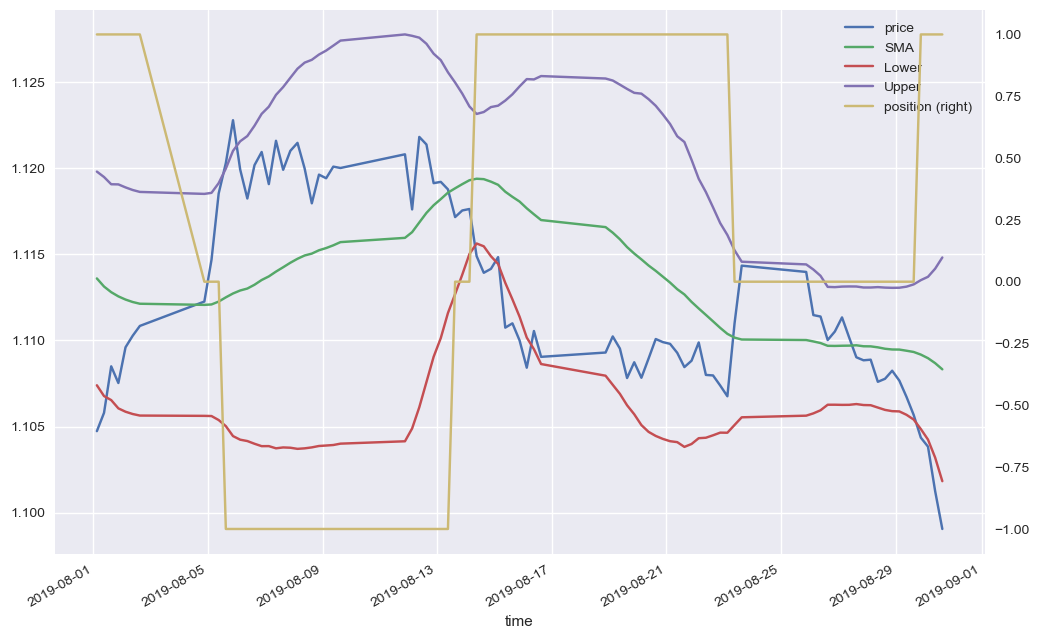

In [36]:
data.drop(columns = ['returns','distance']).loc['2019-08'].plot(figsize = (12,8), secondary_y = 'position')
plt.show()

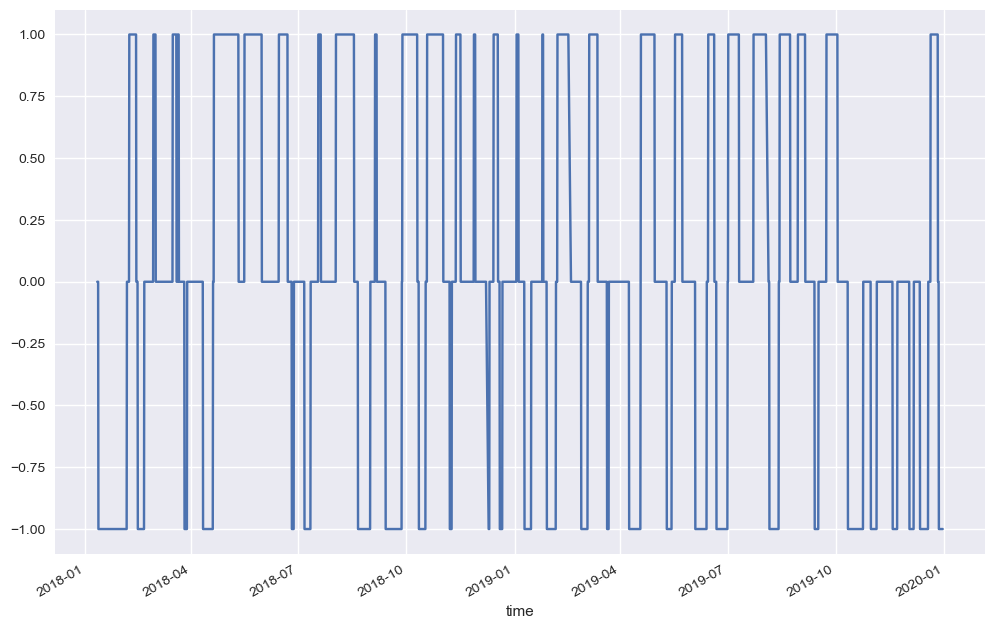

In [37]:
#two years period of trades
data.position.plot(figsize = (12,8))
plt.show()

## 3. Vectorized strategy backtesting

In [38]:
data['strategy'] = data.position.shift(1) * data['returns']

In [39]:
data.dropna(inplace=True)

In [40]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy
time,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887
...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138


In [41]:
data[['returns','strategy']].sum().apply(np.exp)

returns     0.937716
strategy    1.078136
dtype: float64

In [42]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

In [43]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
time,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115
...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387


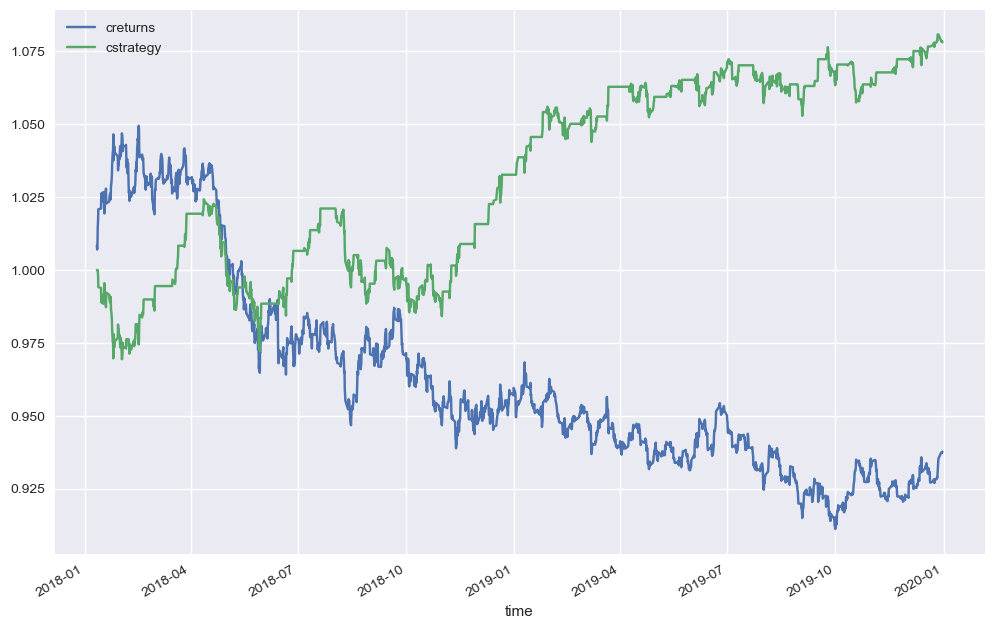

In [44]:
data[['creturns','cstrategy']].plot(figsize=(12,8))                         
plt.show()

In [45]:
#proportional trading cost
ptc = 0.00007

In [46]:
data['trades'] = data.position.diff().fillna(0).abs()

In [47]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0


In [48]:
data.trades.value_counts()

0.0    1929
1.0     111
Name: trades, dtype: int64

In [49]:
data['strategy_net'] = data.strategy - data.trades * ptc

In [50]:
data['cstrategy_net'] = data.strategy_net.cumsum().apply(np.exp)

In [51]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
time,,,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0,0.000000,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0,-0.000000,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0,0.000000,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0,-0.000070,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0,-0.001887,0.998045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0,-0.002092,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0,-0.000018,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0,-0.000138,1.070040


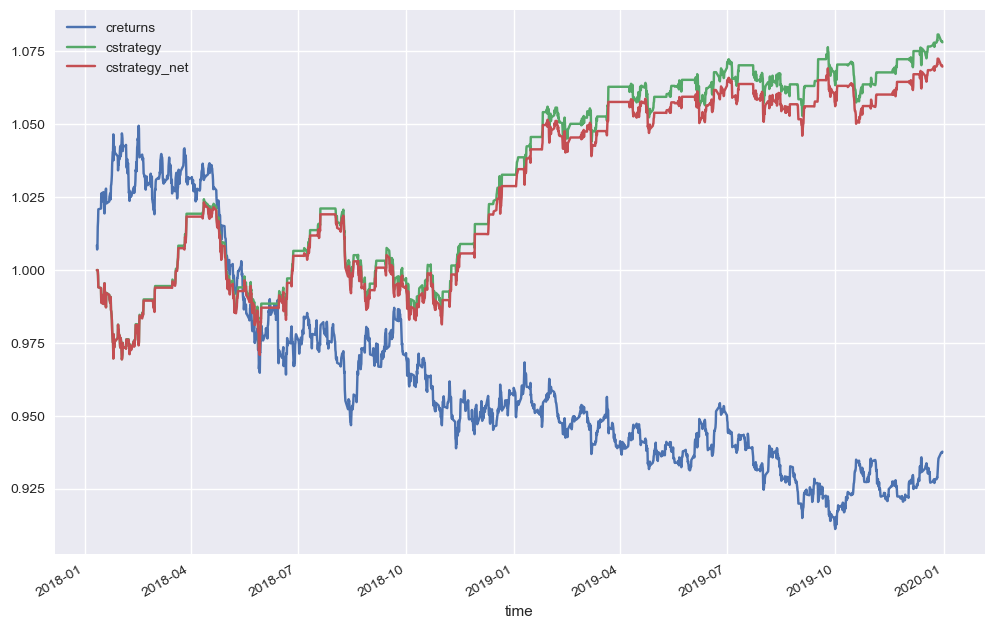

In [52]:
#green and red is only the trading cost difference
data[['creturns','cstrategy','cstrategy_net']].plot(figsize=(12,8))
plt.show()

In [53]:
#annualized return
data[['returns','strategy_net']].mean() * (4 * 252)

returns        -0.031776
strategy_net    0.033335
dtype: float64

In [54]:
#annualized risk
data[['returns','strategy_net']].std() * np.sqrt(4*252)

returns         0.059975
strategy_net    0.044624
dtype: float64

## 4. Adjusting the framework and creating a backtester class

In [272]:
class BollBacktester():
    ''' Class for the vectorized backtesting of Bollinger Bands trading strategies.
    
    Attributes
    ============
    filepath: str
        local filepath of the dataset (csv-file)
    symbol: str
        ticker symbol (instrument) to be backtested
    start: str
        start date for data import
    end: str
        end date for data import
    tc: float
        proportional trading costs per trade
    
    
    Methods
    =======
    get_data:
        imports the data.
        
    test_strategy:
        prepares the data and backtests the trading strategy incl. reporting (wrapper).
        
    prepare_data:
        prepares the data for backtesting.
    
    run_backtest:
        runs the strategy backtest.
        
    upsample:
        upsamples/copies trading positions back to higher frequency.
        
    plot_results:
        plots the cumulative performance of the trading strategy compared to buy-and-hold.
        
    optimize_strategy:
        backtests strategy for different parameter values incl. optimization and reporting (wrapper).
    
    find_best_strategy:
        finds the optimal strategy (global maximum) given the parameter ranges.
        
    visualize_many:
        plots parameter values vs. performance. 
        
    add_sessions:
        adds/labels trading sessions and their compound returns.
    
    add_stop_loss:
        adds stop loss to the strategy.
    
    add_take_profit: 
        adds take profit to the strategy.
        
    add_leverage:
        adds leverage to the strategy.
        
    print_performance:
        calculates and prints various performance metrics.
        
    '''    
    
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.tp_year = (self.data.price.count() / ((self.data.index[-1] - self.data.index[0]).days / 365.25))
        
    def __repr__(self):
        return "BollBacktester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data.
        '''
        raw = pd.read_csv(self.filepath, parse_dates = ["time"], index_col = "time")
        raw = raw[self.symbol].to_frame().fillna(method = "ffill")
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw
        
    def test_strategy(self, freq = 60, window = 50, dev = 2): # Adj!!!
        '''
        Prepares the data and backtests the trading strategy incl. reporting (Wrapper).
         
        Parameters
        ============
        freq: int
            data frequency/granularity to work with (in minutes)
        
        window: int
            time window (number of bars) to calculate the simple moving average price (SMA).
            
        dev: int
            number of standard deviations to calculate upper and lower bands.
        '''
        self.freq = "{}min".format(freq) 
        self.window = window
        self.dev = dev # NEW!!!
                                
        self.prepare_data(freq, window, dev) 
        self.upsample() 
        self.run_backtest()
        
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        self.print_performance()
    
    def prepare_data(self, freq, window, dev): # Adj!!!
        ''' Prepares the Data for Backtesting.
        '''
        data = self.data.price.to_frame().copy()
        freq = "{}min".format(freq)
        resamp = data.resample(freq).last().dropna().iloc[:-1]
        
        ######### INSERT THE STRATEGY SPECIFIC CODE HERE ##################
        resamp["SMA"] = resamp["price"].rolling(window).mean()
        resamp["Lower"] = resamp["SMA"] - resamp["price"].rolling(window).std() * dev
        resamp["Upper"] = resamp["SMA"] + resamp["price"].rolling(window).std() * dev
        
        resamp["distance"] = resamp.price - resamp.SMA
        resamp["position"] = np.where(resamp.price < resamp.Lower, 1, np.nan)
        resamp["position"] = np.where(resamp.price > resamp.Upper, -1, resamp["position"])
        resamp["position"] = np.where(resamp.distance * resamp.distance.shift(1) < 0, 0, resamp["position"])
        resamp["position"] = resamp.position.ffill().fillna(0)
        ###################################################################

        resamp.dropna(inplace = True)
        self.results = resamp
        return resamp 
    
    def run_backtest(self):
        ''' Runs the strategy backtest.
        '''
        
        data = self.results.copy()
        data["strategy"] = data["position"].shift(1) * data["returns"]
        
        # determine the number of trades in each bar
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        data.strategy = data.strategy - data.trades * self.tc
        
        self.results = data
        
    def upsample(self):
        '''  Upsamples/copies trading positions back to higher frequency.
        '''
        
        data = self.data.copy()
        resamp = self.results.copy()
               
        data["position"] = resamp.position.shift()
        data = data.loc[resamp.index[0]:].copy()
        data.position = data.position.shift(-1).ffill()
        data.dropna(inplace=True)
        self.results = data
            
    def plot_results(self, leverage = False):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        elif leverage:
            title = "{} | Window = {} | Frequency = {} | TC = {} | Leverage = {}".format(self.symbol, self.window, self.freq, self.tc, self.leverage)
            self.results[["creturns", "cstrategy", "cstrategy_levered"]].plot(title=title, figsize=(12, 8))
        else:
            title = "{} | Window = {} | Frequency = {} | TC = {}".format(self.symbol, self.window, self.freq, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_strategy(self, freq_range, window_range, dev_range, metric = "Multiple"): # Adj!!!
        '''
        Backtests strategy for different parameter values incl. Optimization and Reporting (Wrapper).
         
        Parameters
        ============
        freq_range: tuple
            tuples of the form (start, end, step size).
        
        window_range: tuple
            tuples of the form (start, end, step size).
        
        dev_range: tuple
            tuples of the form (start, end, step size).
        
        metric: str
            performance metric to be optimized (can be: "Multiple", "Sharpe", "Sortino", "Calmar", "Kelly")
        '''
        
        self.metric = metric
        
        if metric == "Multiple":
            performance_function = self.calculate_multiple
        elif metric == "Sharpe":
            performance_function = self.calculate_sharpe
        elif metric == "Sortino":
            performance_function = self.calculate_sortino
        elif metric == "Calmar": 
            performance_function = self.calculate_calmar
        elif metric == "Kelly": 
            performance_function = self.calculate_kelly_criterion
        
        freqs = range(*freq_range)  
        windows = range(*window_range)
        devs = np.arange(*dev_range) # NEW!!!
        
        combinations = list(product(freqs, windows, devs))
        
        performance = []
        for comb in combinations: 
            self.prepare_data(comb[0], comb[1], comb[2])
            self.upsample()
            self.run_backtest()
            performance.append(performance_function(self.results.strategy))
    
        self.results_overview =  pd.DataFrame(data = np.array(combinations),
                                              columns = ["Freq", "Windows", "Devs"])
        self.results_overview["Performance"] = performance
        self.find_best_strategy()
        
    def find_best_strategy(self):
        ''' Finds the optimal strategy (global maximum) given the parameter ranges.
        '''
        best = self.results_overview.nlargest(1, "Performance")
        freq = int(best.Freq.iloc[0]) 
        window = int(best.Windows.iloc[0])
        dev = best.Devs.iloc[0] # NEW!!!
        perf = best.Performance.iloc[0]
        print("Frequency: {} | Windows: {} | Devs: {} | {}: {}".format(freq, window, dev, self.metric, round(perf, 6))) 
        self.test_strategy(freq, window, dev) 
        
    def visualize_many(self):
        ''' Plots parameter values vs. Performance.
        '''

        if self.results_overview is None:
            print("Run optimize_strategy() first.")
        else: 
            matrix = self.results_overview.pivot(index = "Freq", columns = "Windows", values = "Performance")
            
            plt.figure(figsize=(12,8))
            sns.set_theme(font_scale=1.5)
            sns.heatmap(matrix, cmap = "RdYlGn", robust = True, cbar_kws = {"label": "{}".format(self.metric)})
            plt.show()
            
    def add_sessions(self, visualize = False):
        ''' 
        Adds/Labels Trading Sessions and their compound returns.
        
        Parameter
        ============
        visualize: bool, default False
            if True, visualize compound session returns over time
        '''
        
        if self.results is None:
            print("Run test_strategy() first.")
            
        data = self.results.copy()
        data["session"] = np.sign(data.trades).cumsum().shift().fillna(0)
        data["session_compound"] = data.groupby("session").strategy.cumsum().apply(np.exp) - 1
        self.results = data
        if visualize:
            data["session_compound"].plot(figsize = (12, 8))
            plt.show()
    
    def add_stop_loss(self, sl_thresh, report = True): 
        ''' 
        Adds Stop Loss to the Strategy.
        
        Parameter
        ============
        sl_thresh: float (negative)
            maximum loss level in % (e.g. -0.02 for -2%)
        
        report: bool, default True
            if True, print Performance Report incl. Stop Loss. 
        '''
        
        self.sl_thresh = sl_thresh
        
        if self.results is None:
            print("Run test_strategy() first.")
        
        self.add_sessions()
        self.results = self.results.groupby("session", group_keys = False).apply(self.define_sl_pos)
        self.run_backtest()
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        self.add_sessions()
        
        if report:
            self.print_performance()
            
            
    def add_take_profit(self, tp_thresh, report = True):
        ''' 
        Adds Take Profit to the Strategy.
        
        Parameter
        ============
        tp_thresh: float (positive)
            maximum profit level in % (e.g. 0.02 for 2%)
        
        report: bool, default True
            if True, print Performance Report incl. Take Profit. 
        '''
        self.tp_thresh = tp_thresh
        
        if self.results is None:
            print("Run test_strategy() first.")
        
        self.add_sessions()
        self.results = self.results.groupby("session", group_keys = False).apply(self.define_tp_pos)
        self.run_backtest()
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        self.add_sessions()
        
        if report:
            self.print_performance()
        
    def define_sl_pos(self, group):
        if (group.session_compound <= self.sl_thresh).any():
            start = group[group.session_compound <= self.sl_thresh].index[0]
            stop = group.index[-2]
            group.loc[start:stop, "position"] = 0
            return group
        else:
            return group 
        
    def define_tp_pos(self, group):
        if (group.session_compound >= self.tp_thresh).any():
            start = group[group.session_compound >= self.tp_thresh].index[0]
            stop = group.index[-2]
            group.loc[start:stop, "position"] = 0
            return group
        else:
            return group
        
    def add_leverage(self, leverage, sl = -0.5, report = True):
        ''' 
        Adds Leverage to the Strategy.
        
        Parameter
        ============
        leverage: float (positive)
            degree of leverage.
        
        sl: float (negative), default -50% (regulatory)
            maximum margin loss level in % (e.g. -0.2 for -20%).
        
        report: bool, default True
            if True, print Performance Report incl. Leverage.
        '''
        
        self.leverage = leverage
        sl_thresh = sl / leverage
        self.add_stop_loss(sl_thresh, report = False)
        
        data = self.results.copy()
        data["simple_ret"] = np.exp(data.strategy) - 1
        data["eff_lev"] = leverage * (1 + data.session_compound) / (1 + data.session_compound * leverage)
        data.eff_lev.fillna(leverage, inplace = True)
        data.loc[data.trades !=0, "eff_lev"] = leverage
        levered_returns = data.eff_lev.shift() * data.simple_ret
        levered_returns = np.where(levered_returns < -1, -1, levered_returns)
        data["strategy_levered"] = levered_returns
        data["cstrategy_levered"] = data.strategy_levered.add(1).cumprod()
        
        self.results = data
            
        if report:
            self.print_performance(leverage = True)
    ############################## Performance ######################################
    
    def print_performance(self, leverage = False):
        ''' Calculates and prints various Performance Metrics.
        '''
        
        data = self.results.copy()
        
        if leverage:
            to_analyze = np.log(data.strategy_levered.add(1))
        else: 
            to_analyze = data.strategy
        
        strategy_multiple = round(self.calculate_multiple(to_analyze), 6)
        bh_multiple =       round(self.calculate_multiple(data.returns), 6)
        outperf =           round(strategy_multiple - bh_multiple, 6)
        cagr =              round(self.calculate_cagr(to_analyze), 6)
        ann_mean =          round(self.calculate_annualized_mean(to_analyze), 6)
        ann_std =           round(self.calculate_annualized_std(to_analyze), 6)
        sharpe =            round(self.calculate_sharpe(to_analyze), 6)
        sortino =           round(self.calculate_sortino(to_analyze), 6)
        max_drawdown =      round(self.calculate_max_drawdown(to_analyze), 6)
        calmar =            round(self.calculate_calmar(to_analyze), 6)
        max_dd_duration =   round(self.calculate_max_dd_duration(to_analyze), 6)
        kelly_criterion =   round(self.calculate_kelly_criterion(to_analyze), 6)
        
        print(100 * "=")
        print("MEAN-REVERSION STRATEGY | INSTRUMENT = {} | Freq: {} | WINDOW = {}".format(self.symbol, self.freq, self.window))
        print(100 * "-")
        #print("\n")
        print("PERFORMANCE MEASURES:")
        print("\n")
        print("Multiple (Strategy):         {}".format(strategy_multiple))
        print("Multiple (Buy-and-Hold):     {}".format(bh_multiple))
        print(38 * "-")
        print("Out-/Underperformance:       {}".format(outperf))
        print("\n")
        print("CAGR:                        {}".format(cagr))
        print("Annualized Mean:             {}".format(ann_mean))
        print("Annualized Std:              {}".format(ann_std))
        print("Sharpe Ratio:                {}".format(sharpe))
        print("Sortino Ratio:               {}".format(sortino))
        print("Maximum Drawdown:            {}".format(max_drawdown))
        print("Calmar Ratio:                {}".format(calmar))
        print("Max Drawdown Duration:       {} Days".format(max_dd_duration))
        print("Kelly Criterion:             {}".format(kelly_criterion))
        
        print(100 * "=")
        
    def calculate_multiple(self, series):
        return np.exp(series.sum())
    
    def calculate_cagr(self, series):
        return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
    
    def calculate_annualized_mean(self, series):
        return series.mean() * self.tp_year
    
    def calculate_annualized_std(self, series):
        return series.std() * np.sqrt(self.tp_year)
    
    def calculate_sharpe(self, series):
        if series.std() == 0:
            return np.nan
        else:
            return series.mean() / series.std() * np.sqrt(self.tp_year)
    
    def calculate_sortino(self, series):
        excess_returns = (series - 0)
        downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
        if downside_deviation == 0:
            return np.nan
        else:
            sortino = (series.mean() - 0) / downside_deviation * np.sqrt(self.tp_year)
            return sortino 
    
    def calculate_max_drawdown(self, series):
        creturns = series.cumsum().apply(np.exp)
        cummax = creturns.cummax()
        drawdown = (cummax - creturns)/cummax
        max_dd = drawdown.max()
        return max_dd
    
    def calculate_calmar(self, series):
        max_dd = self.calculate_max_drawdown(series)
        if max_dd == 0:
            return np.nan
        else:
            cagr = self.calculate_cagr(series)
            calmar = cagr / max_dd
            return calmar
    
    def calculate_max_dd_duration(self, series):
        creturns = series.cumsum().apply(np.exp)
        cummax = creturns.cummax()
        drawdown = (cummax - creturns)/cummax
    
        begin = drawdown[drawdown == 0].index
        end = begin[1:]
        end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
        periods = end - begin
        max_ddd = periods.max()
        return max_ddd.days
    
    def calculate_kelly_criterion(self, series):
        series = np.exp(series) - 1
        if series.var() == 0:
            return np.nan
        else:
            return series.mean() / series.var()
    
    ############################## Performance ######################################

### 5. Backtesting

In [273]:
filepath = 'one_minute.csv'
symbol = 'EURUSD'
start = '2018-01-01'
end = '2019-12-31'
ptc = 0.00007

In [274]:
tester = BollBacktester(filepath=filepath, symbol=symbol, start=start, end=end, tc=ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-01-01, end = 2019-12-31)

In [275]:
tester.test_strategy(freq=180, window=100, dev=2)

MEAN-REVERSION STRATEGY | INSTRUMENT = EURUSD | Freq: 180min | WINDOW = 100
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.184301
Multiple (Buy-and-Hold):     0.918435
--------------------------------------
Out-/Underperformance:       0.265866


CAGR:                        0.090783
Annualized Mean:             0.086933
Annualized Std:              0.046977
Sharpe Ratio:                1.850556
Sortino Ratio:               2.652647
Maximum Drawdown:            0.044049
Calmar Ratio:                2.060969
Max Drawdown Duration:       97 Days
Kelly Criterion:             39.892029


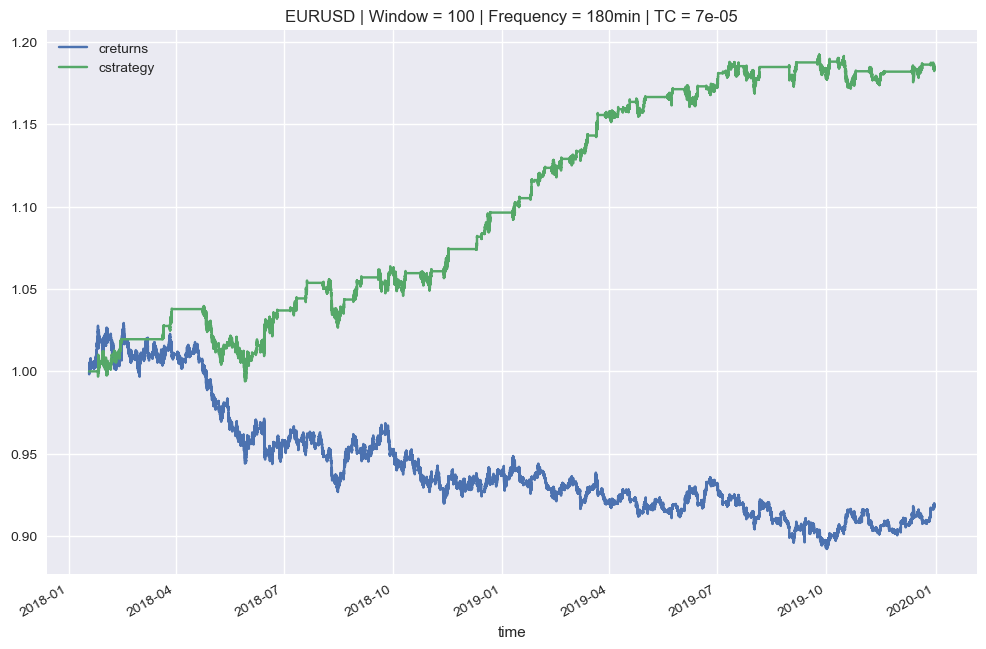

In [276]:
tester.plot_results()

In [277]:
tester.results.position.value_counts()

 0.0    394027
 1.0    205614
-1.0    120371
Name: position, dtype: int64

In [290]:
tester.test_strategy(freq=180, window=100, dev=3)

MEAN-REVERSION STRATEGY | INSTRUMENT = EURUSD | Freq: 180min | WINDOW = 100
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.060657
Multiple (Buy-and-Hold):     0.918435
--------------------------------------
Out-/Underperformance:       0.142222


CAGR:                        0.030714
Annualized Mean:             0.030265
Annualized Std:              0.020265
Sharpe Ratio:                1.493473
Sortino Ratio:               2.114018
Maximum Drawdown:            0.014267
Calmar Ratio:                2.152883
Max Drawdown Duration:       116 Days
Kelly Criterion:             74.203265


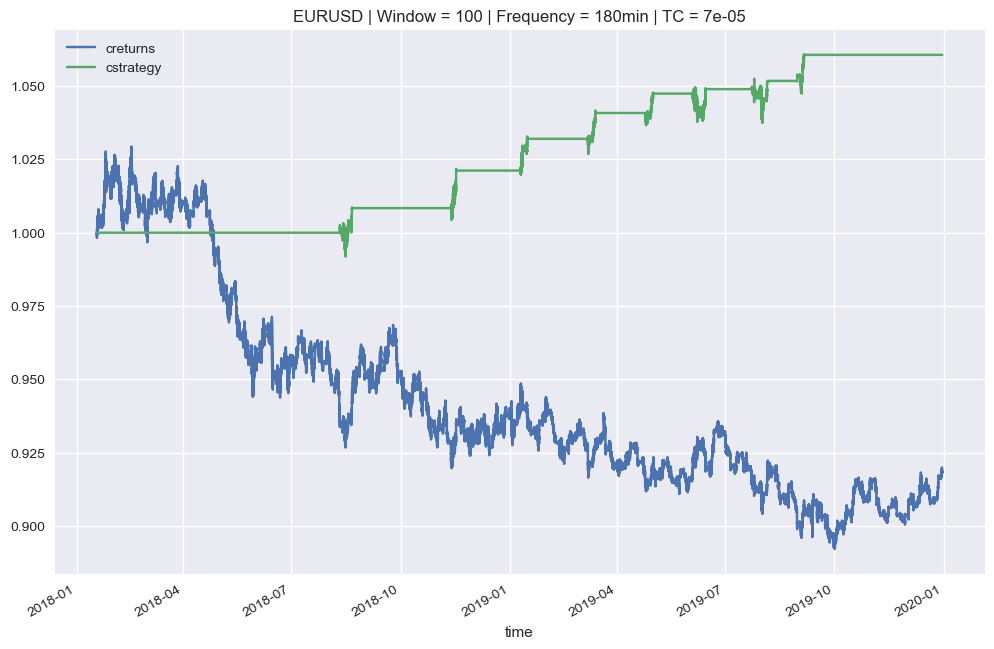

In [291]:
tester.plot_results()

In [293]:
tester.add_leverage(30, sl=-0.4)

MEAN-REVERSION STRATEGY | INSTRUMENT = EURUSD | Freq: 180min | WINDOW = 100
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         4.800806
Multiple (Buy-and-Hold):     0.918435
--------------------------------------
Out-/Underperformance:       3.882371


CAGR:                        1.238721
Annualized Mean:             0.806252
Annualized Std:              0.623094
Sharpe Ratio:                1.293949
Sortino Ratio:               1.818221
Maximum Drawdown:            0.389066
Calmar Ratio:                3.183834
Max Drawdown Duration:       116 Days
Kelly Criterion:             2.582898


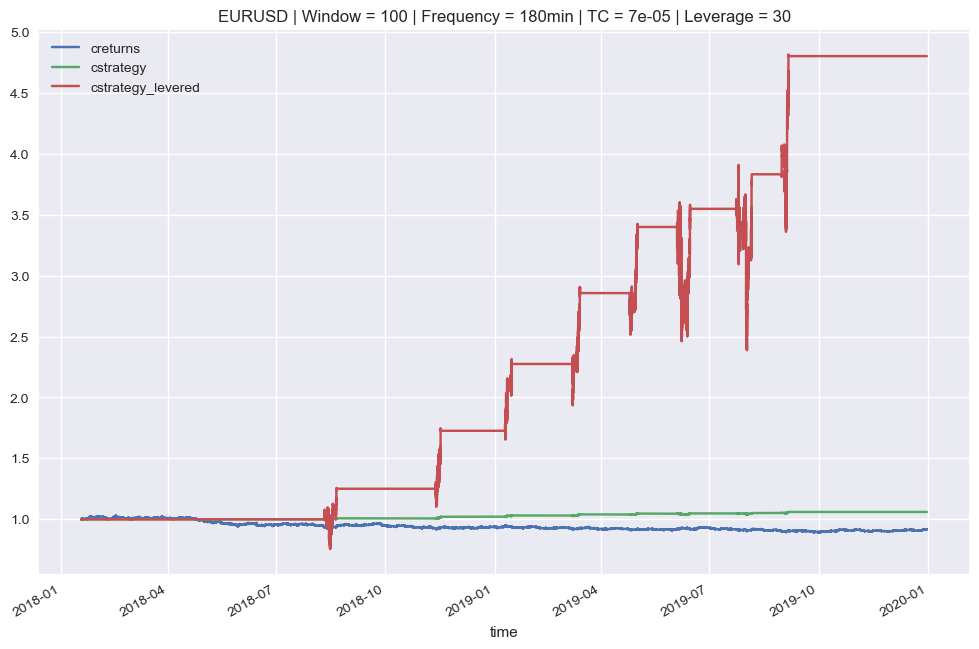

In [294]:
tester.plot_results(leverage=True)